In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25, random_state = 42)

In [7]:
# Model kurma
gbm = GradientBoostingRegressor()

# model eğitme
gbm.fit(X_train, y_train)

GradientBoostingRegressor()

## Tahmin

In [8]:
y_pred = gbm.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

281.25760412203874

## Model Tuning

In [9]:
gbm_params = {
    "learning_rate": [0.001, 0.01, 0.1, 0.2],
    "max_depth": [3, 5, 8, 50, 100],
    "n_estimators": [200, 500, 1000, 2000],
    "subsample": [1, 0.5, 0.75]
}

In [12]:
gbm = GradientBoostingRegressor()

gbm_cv_model = GridSearchCV(gbm, gbm_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2)

gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=1; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=1; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.75; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.75; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000, subsample=1; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000, subsample=0.75; total

[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=1; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.75; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000, subsample=1; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimat

[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=1; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.75; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000, subsample=1; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimator

[CV] END learning_rate=0.01, max_depth=8, n_estimators=500, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=8, n_estimators=500, subsample=0.75; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=8, n_estimators=1000, subsample=1; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=8, n_estimators=1000, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=8, n_estimators=1000, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=8, n_estimators=1000, subsample=0.75; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=8, n_estimators=2000, subsample=1; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=8, n_estimators=2000, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=8, n_estimators=2000, subsample=0.5; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=8, n_estimators=2000, subsample=0.75; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=50, n_estimato

[CV] END learning_rate=0.001, max_depth=8, n_estimators=500, subsample=0.75; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=8, n_estimators=1000, subsample=1; total time=   1.3s
[CV] END learning_rate=0.001, max_depth=8, n_estimators=1000, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.001, max_depth=8, n_estimators=1000, subsample=0.75; total time=   1.0s
[CV] END learning_rate=0.001, max_depth=8, n_estimators=1000, subsample=0.75; total time=   1.0s
[CV] END learning_rate=0.001, max_depth=8, n_estimators=2000, subsample=1; total time=   2.5s
[CV] END learning_rate=0.001, max_depth=8, n_estimators=2000, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.001, max_depth=8, n_estimators=2000, subsample=0.75; total time=   1.9s
[CV] END learning_rate=0.001, max_depth=8, n_estimators=2000, subsample=0.75; total time=   2.1s
[CV] END learning_rate=0.001, max_depth=50, n_estimators=500, subsample=1; total time=   0.7s
[CV] END learning_rate=0.001, max_depth=50

[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.75; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=1; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.75; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000, subsample=1; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimat

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [13]:
# En iyi parametreyi bulma
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}

In [14]:
# En iyi parametre ile model
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,
                                     max_depth = 3,
                                     n_estimators = 1000,
                                     subsample = 0.5)
gbm_tuned = gbm_tuned.fit(X_train, y_train)

In [16]:
# En iyi değer ile hata değerine ulaşma
y_pred = gbm_tuned.predict(X_test)

print("Tahmin hatası: ",np.sqrt(mean_squared_error(y_test, y_pred)))

Tahmin hatası:  256.2036459146662


In [18]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

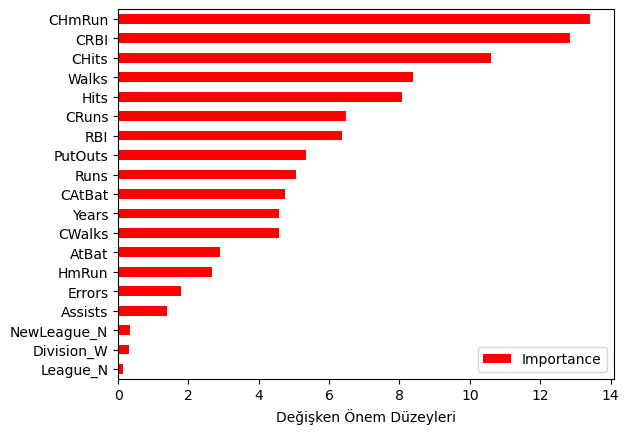

In [21]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel("Değişken Önem Düzeyleri")